In [2]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

from typing import List, Dict, Any, Set, Tuple, Union, Optional


In [7]:
check_by_banner_urls = {}
check_bys = set()
for i in range(1,200):
    try:
        check_by_banner_url = [soup.attrs['src'] for soup in bs(requests.get("http://factcheck.snu.ac.kr/v2/facts/%d"%i).text, 'html.parser').select(".checked_by img")]
        check_by = set(url.split(".")[-2].split("_")[2] for url in check_by_banner_url)
        check_bys |= check_by
    except:
        continue
    check_by_banner_urls[i] = check_by_banner_url
print(check_bys)

{'mbc', 'inews24', 'MBN', 'joongang', '%E1%84%8B%E1%85%A9%E1%84%86%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%82%E1%85%B2%E1%84%89%E1%85%B3', 'd', 'sbs', 'hankookilbo', 'JTBC', 'tvchosun', 'seoul', '%E1%84%80%E1%85%AE%E1%86%A8%E1%84%86%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%87%E1%85%A9', 'kbs', 'maekyung', '2', '%EB%89%B4%EC%8B%9C%EC%8A%A4', 'ytn', 'chosun'}


mbc: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/11/banner_mbc.png


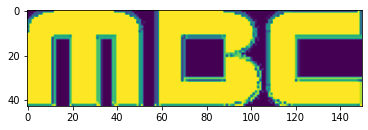

inews24: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/4/banner_inews24.png


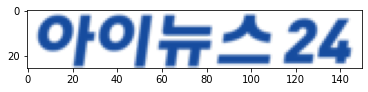

MBN: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/16/banner_MBN.png


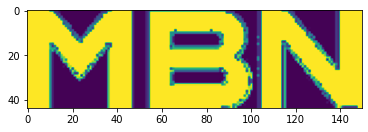

joongang: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/21/banner_joongang.png


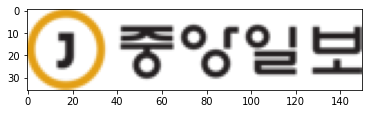

d: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/5/banner_d.png


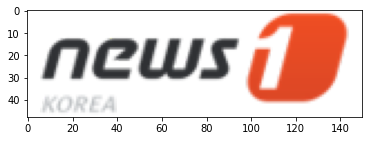

sbs: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/20/banner_sbs.png


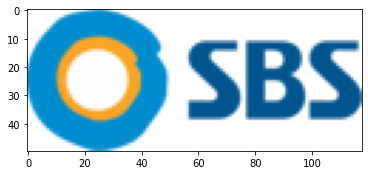

hankookilbo: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/13/banner_hankookilbo.png


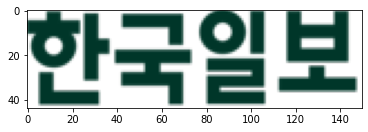

JTBC: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/22/banner_JTBC.png


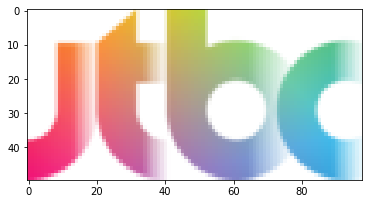

tvchosun: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/10/banner_tvchosun.png


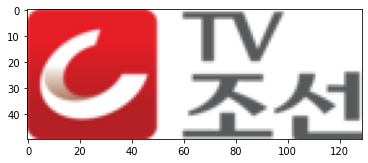

seoul: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/19/banner_seoul.png


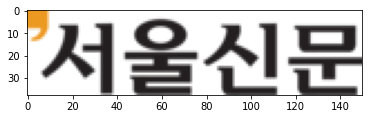

kbs: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/14/banner_kbs.png


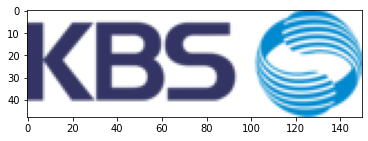

maekyung: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/18/banner_maekyung.png


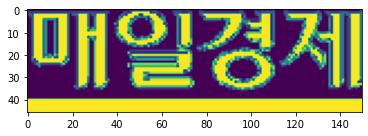

2: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/12/banner_2.png


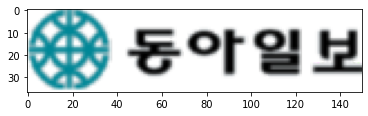

%EB%89%B4%EC%8B%9C%EC%8A%A4: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/3/banner_%EB%89%B4%EC%8B%9C%EC%8A%A4.png


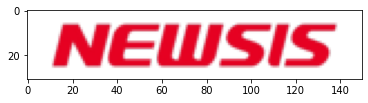

ytn: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/23/banner_ytn.png


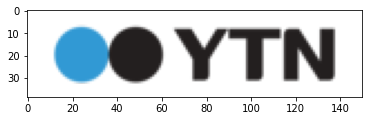

chosun: https://s3.ap-northeast-2.amazonaws.com/elasticbeanstalk-ap-northeast-2-044030252423/public/uploads/press/logo_image/17/banner_chosun.png


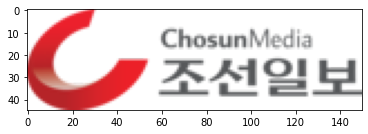

In [8]:
urls = set(sum(check_by_banner_urls.values(), []))
for i in check_bys:
    for url in urls:
        if url.split("_")[-1].split(".")[0] == i:
            print(f"{i}: {url}")
            plt.imshow(np.array(Image.open(BytesIO(requests.get(url).content))))
            plt.show()

In [5]:
pub_raw_set = {'mbc', 'inews24', 'MBN', 'joongang', '%E1%84%8B%E1%85%A9%E1%84%86%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%82%E1%85%B2%E1%84%89%E1%85%B3', 'd', 'sbs', 'hankookilbo', 'JTBC', 'tvchosun', 'seoul', '%E1%84%80%E1%85%AE%E1%86%A8%E1%84%86%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%87%E1%85%A9', 'kbs', 'maekyung', '2', '%EB%89%B4%EC%8B%9C%EC%8A%A4', 'ytn', 'chosun'}
pub_uft = {pub: requests.utils.unquote(pub) for pub in pub_raw_set if pub[0] == '%'}
pub_table = {'2': 'donga', 'd': 'news1'} | pub_uft
print(pub_table)

{'2': 'donga', 'd': 'news1', '%E1%84%80%E1%85%AE%E1%86%A8%E1%84%86%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%87%E1%85%A9': '국민일보', '%E1%84%8B%E1%85%A9%E1%84%86%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%82%E1%85%B2%E1%84%89%E1%85%B3': '오마이뉴스', '%EB%89%B4%EC%8B%9C%EC%8A%A4': '뉴시스'}


In [6]:
import os
os.chdir("..")
print(os.getcwd().split("\\")[-1])

snu-factcheck-analytics


In [7]:
pub_raw_saving_path = 'data/pub_raw_set.txt'
with open(pub_raw_saving_path, 'w', encoding='utf-8') as f:
    for pub in pub_raw_set:
        f.write(pub + '\n')

In [8]:
pub_table_saving_path = 'data/pub_table.txt'
with open(pub_table_saving_path, 'w', encoding='utf-8') as f:
    for raw, real in pub_table.items():
        f.write(f"{raw} {real}\n")

In [13]:
print(1) if 0 else None